<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/DSR_NLP3_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Self Supervised Learning: Using Gensim to create word embeddings.

In this notebook we will use Gensime to create word embeddings from a corpus.

---

Firstly, we download the corpus.

In [9]:
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

#!wget -nc "https://www.gutenberg.org/files/2554/2554-0.txt" -O "Dostoyevski_Crime_Punishment.txt"


from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/data/Dostoyevski_Crime_Punishment_cleaned.txt' Dostoyevski_Crime_Punishment_cleaned.txt

Mounted at /content/gdrive


In [10]:
!ls -lh
#!rm Dostoyevski_Crime_Punishment.txt

total 1.2M
-rw------- 1 root root 1.2M Oct 27 12:08 Dostoyevski_Crime_Punishment_cleaned.txt
drwx------ 5 root root 4.0K Oct 27 12:08 gdrive
drwxr-xr-x 1 root root 4.0K Oct 25 13:35 sample_data


## Import all necessary modules.

In [11]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Train Gensim.

In [12]:
class Sentences(object):
    def __init__(self):
        self.sentence_count = 0
        self.epoch = 0

    def __iter__(self):
        print(f"Epoch {self.epoch}")
        self.epoch += 1

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        for fname in files:
            print(fname)
            with open(fname) as f_input:
                corpus = f_input.read()
            raw_sentences = sent_tokenize(corpus)
            for sentence in raw_sentences:
                if len(sentence) > 0:
                    self.sentence_count += 1
                    yield simple_preprocess(sentence)


sentences = Sentences()

model = Word2Vec(
    sg=1,
    size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

model.build_vocab(sentences)

model.train(sentences=sentences, total_examples=model.corpus_count, epochs=5)

print("Done.")

Epoch 0
Dostoyevski_Crime_Punishment_cleaned.txt
Epoch 1
Dostoyevski_Crime_Punishment_cleaned.txt
Epoch 2
Dostoyevski_Crime_Punishment_cleaned.txt
Epoch 3
Dostoyevski_Crime_Punishment_cleaned.txt
Epoch 4
Dostoyevski_Crime_Punishment_cleaned.txt
Epoch 5
Dostoyevski_Crime_Punishment_cleaned.txt
Done.


In [13]:
#inverse_vocab = {index: token for token, index in model.wv.vocab.items()}
#print(inverse_vocab)
import pandas as pd
voc = pd.DataFrame(index=range(len(model.wv.vocab.items())), columns=['word', 'occ'])
i = 0
for token, index in model.wv.vocab.items():
  count = int(index.count)
  #print(type(count))
  #print(f'{token}: {count}')
  voc.word[i] = token
  voc.occ[i] = count
  i += 1
  #if i==1:
  #  break

In [14]:
voc.sort_values(by='occ',ascending=False)[60:80]

,word,occ
422,come,480
10,man,475
489,then,470
274,very,465
1065,don,464
97,only,456
704,we,456
40,like,453
194,why,445
24,though,442


## Find most similar words.

In [66]:
model.wv.most_similar("raskolnikov", topn=20)

[('razumihin', 0.925221860408783),
 ('nikodim', 0.8551923036575317),
 ('porfiry', 0.8492258787155151),
 ('reply', 0.841866135597229),
 ('zossimov', 0.841838002204895),
 ('zametov', 0.8417707085609436),
 ('seeming', 0.8388420343399048),
 ('svidrigaïlov', 0.8372278809547424),
 ('curiosity', 0.8280156850814819),
 ('suddenly', 0.8239268064498901),
 ('fomitch', 0.8237036466598511),
 ('quietly', 0.8192252516746521),
 ('distinctly', 0.8184658885002136),
 ('surprise', 0.8147234320640564),
 ('paused', 0.8122290968894958),
 ('raising', 0.8101276755332947),
 ('clerk', 0.8081619143486023),
 ('pause', 0.8074177503585815),
 ('dismay', 0.8072602152824402),
 ('he', 0.8072197437286377)]

## Plot word similarities.

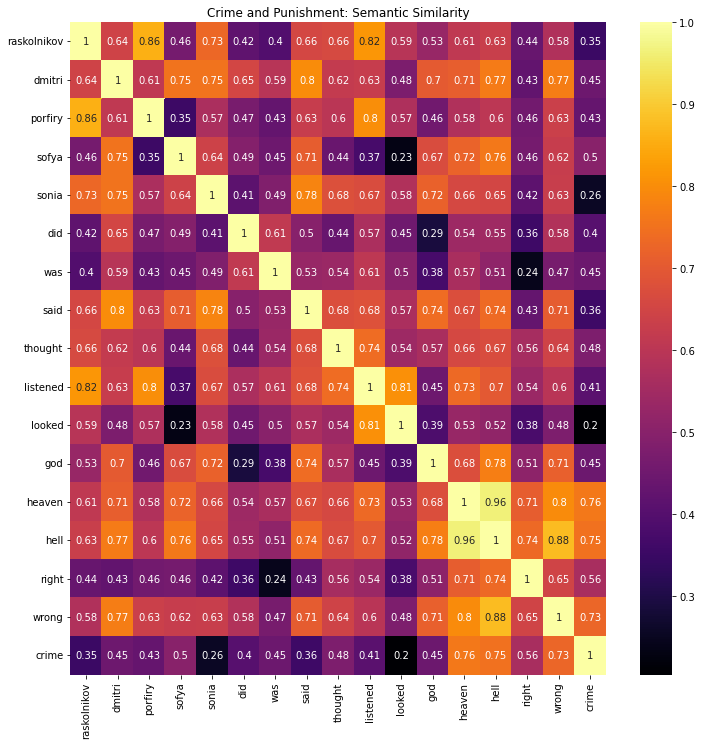

In [15]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Crime and Punishment: Semantic Similarity")
            
words = [
    "raskolnikov",
    "dmitri",
    "porfiry",
    "sofya",
    "sonia",
    "did",
    "was",
    "said",
    "thought",
    "listened",
    "looked",
    "god",
    "heaven",
    "hell",
    "right",
    "wrong",
    "crime",
]
plot_similarities(words)
plt.savefig('fig.png')

# Thank you!